In [6]:
# Importaciones generales
import pandas as pd
import numpy as np
import pickle

# Importaciones para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importaciones de Scikit-learn para preprocesamiento y métricas
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Nota: El dataset de Boston está obsoleto en versiones recientes de sklearn.
# En su lugar, usaremos el dataset de California Housing que es una alternativa moderna.
from sklearn.datasets import fetch_california_housing

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


### Ejercicio 1: Integración de Datos de Enfermedades Cardíacas

**Objetivo:** Realizar el proceso de integración de datos de diferentes fuentes de datos sobre enfermedades cardíacas.

**Nota:** Los archivos originales del UCI ML Repository pueden no estar disponibles localmente. Este ejercicio descargará automáticamente los datos o utilizará el dataset de Heart Disease incluido en scikit-learn como alternativa.

**Proceso:**
1. Intentar cargar archivos locales o descargarlos automáticamente desde UCI ML Repository.
2. Definir nombres de columnas según la documentación del dataset.
3. Integrar múltiples DataFrames en uno solo.
4. Analizar el dataset integrado y manejar valores nulos.

In [8]:
# Ejercicio 1: Integración de Datos de Enfermedades Cardíacas
import os
import urllib.request

# 1. Definir los nombres de las columnas según la documentación del dataset UCI Heart Disease
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# URLs de los datasets en UCI ML Repository
datasets_info = {
    'cleveland': 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
    'hungarian': 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data',
    'switzerland': 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
}

# Intentar cargar o descargar los archivos
dataframes = {}
download_attempted = False

for name, url in datasets_info.items():
    file_name = f'heart-disease.{name}.csv'
    
    # Intentar cargar archivo local
    if not os.path.exists(file_name):
        if not download_attempted:
            print("Archivos no encontrados localmente. Intentando descargar desde UCI ML Repository...")
            download_attempted = True
        
        try:
            print(f"  Descargando {name}...", end=' ')
            urllib.request.urlretrieve(url, file_name)
            print("✓")
        except Exception as e:
            print(f"✗ (Error: {e})")
            continue
    
    # Cargar el archivo
    try:
        df = pd.read_csv(file_name, header=None, names=column_names, na_values='?')
        df['origin'] = name
        dataframes[name] = df
        if not download_attempted:
            print(f"Archivo {name} cargado desde disco local.")
    except Exception as e:
        print(f"Error al cargar {name}: {e}")

# Verificar si se cargaron los datos
if dataframes:
    print(f"\n✓ {len(dataframes)} conjuntos de datos cargados correctamente.")
    
    # 3. Integrar los DataFrames en uno solo usando pd.concat
    df_integrated = pd.concat(dataframes.values(), ignore_index=True)
    
    # 4. Mostrar información del DataFrame integrado
    print("\n" + "="*70)
    print("PROCESO DE INTEGRACIÓN COMPLETADO")
    print("="*70)
    print(f"Dimensiones del DataFrame integrado: {df_integrated.shape}")
    print(f"  - Filas (muestras): {df_integrated.shape[0]}")
    print(f"  - Columnas (características): {df_integrated.shape[1]}")
    
    print(f"\nOrigen de los datos:")
    print(df_integrated['origin'].value_counts())
    
    print("\nPrimeras 5 filas del DataFrame integrado:")
    display(df_integrated.head())
    
    print("\nÚltimas 5 filas del DataFrame integrado:")
    display(df_integrated.tail())
    
    print("\nResumen de valores nulos por columna:")
    null_summary = df_integrated.isnull().sum()
    null_summary = null_summary[null_summary > 0].sort_values(ascending=False)
    if len(null_summary) > 0:
        display(pd.DataFrame({
            'Columna': null_summary.index,
            'Valores Nulos': null_summary.values,
            'Porcentaje': (null_summary.values / len(df_integrated) * 100).round(2)
        }))
        print(f"\nTotal de valores nulos: {df_integrated.isnull().sum().sum()}")
    else:
        print("No hay valores nulos en el dataset integrado.")
    
    # Información adicional
    print("\nInformación del DataFrame:")
    df_integrated.info()
    
    print("\nEstadísticas descriptivas:")
    display(df_integrated.describe())
    
else:
    print("\n⚠ No se pudieron cargar los archivos desde UCI. Usando dataset alternativo de scikit-learn...")
    print("\nCargando dataset de Heart Disease de Statlog...")
    
    # Crear un dataset sintético basado en características similares
    from sklearn.datasets import make_classification
    
    # Generar datos sintéticos que simulan el dataset de enfermedades cardíacas
    X, y = make_classification(
        n_samples=600, 
        n_features=13, 
        n_informative=10,
        n_redundant=3,
        n_classes=2,
        random_state=42,
        flip_y=0.1
    )
    
    # Crear DataFrame con nombres de columnas apropiados
    df_integrated = pd.DataFrame(X, columns=column_names[:-1])
    df_integrated['target'] = y
    df_integrated['origin'] = 'synthetic'
    
    # Ajustar valores a rangos realistas
    df_integrated['age'] = (df_integrated['age'] * 10 + 55).clip(29, 77).astype(int)
    df_integrated['sex'] = (df_integrated['sex'] > 0).astype(int)
    df_integrated['cp'] = ((df_integrated['cp'] + 2) % 4).astype(int)
    df_integrated['trestbps'] = (df_integrated['trestbps'] * 20 + 130).clip(94, 200).astype(int)
    df_integrated['chol'] = (df_integrated['chol'] * 50 + 240).clip(126, 564).astype(int)
    df_integrated['fbs'] = (df_integrated['fbs'] > 0).astype(int)
    
    print("\n✓ Dataset sintético creado con éxito.")
    print(f"Dimensiones: {df_integrated.shape}")
    print("\nPrimeras filas del dataset:")
    display(df_integrated.head(10))
    
    print("\nNota: Este es un dataset sintético generado para fines educativos.")
    print("Tiene características similares al dataset original de Heart Disease.")

Archivo cleveland cargado desde disco local.
Archivo hungarian cargado desde disco local.
Archivo switzerland cargado desde disco local.

✓ 3 conjuntos de datos cargados correctamente.

PROCESO DE INTEGRACIÓN COMPLETADO
Dimensiones del DataFrame integrado: (720, 15)
  - Filas (muestras): 720
  - Columnas (características): 15

Origen de los datos:
origin
cleveland      303
hungarian      294
switzerland    123
Name: count, dtype: int64

Primeras 5 filas del DataFrame integrado:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,origin
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland



Últimas 5 filas del DataFrame integrado:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,origin
715,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1,switzerland
716,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3,switzerland
717,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0,switzerland
718,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1,switzerland
719,74.0,1.0,2.0,145.0,0.0,NaN,1.0,123.0,0.0,1.3,1.0,NaN,NaN,1,switzerland



Resumen de valores nulos por columna:


,Columna,Valores Nulos,Porcentaje
0,ca,413,57.36
1,thal,320,44.44
2,slope,207,28.75
3,fbs,83,11.53
4,chol,23,3.19
5,oldpeak,6,0.83
6,trestbps,3,0.42
7,exang,2,0.28
8,restecg,2,0.28
9,thalach,2,0.28



Total de valores nulos: 1061

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       720 non-null    float64
 1   sex       720 non-null    float64
 2   cp        720 non-null    float64
 3   trestbps  717 non-null    float64
 4   chol      697 non-null    float64
 5   fbs       637 non-null    float64
 6   restecg   718 non-null    float64
 7   thalach   718 non-null    float64
 8   exang     718 non-null    float64
 9   oldpeak   714 non-null    float64
 10  slope     513 non-null    float64
 11  ca        307 non-null    float64
 12  thal      400 non-null    float64
 13  target    720 non-null    int64  
 14  origin    720 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 84.5+ KB

Estadísticas descriptivas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,720.000000,720.000000,720.000000,717.000000,697.000000,637.000000,718.000000,718.000000,718.000000,714.000000,513.000000,307.000000,400.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,204.774749,0.109890,0.568245,140.565460,0.337047,0.789636,1.701754,0.680782,4.985000,0.850000
std,9.193720,0.439546,0.953646,18.529331,109.275156,0.312999,0.833534,25.647172,0.473031,1.066961,0.585249,0.937101,1.929789,1.076878
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000,0.000000,6.000000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Ejercicio 2: Preparación de Datos del Conjunto "California Housing"

**Objetivo:** Aplicar las técnicas de preparación de datos necesarias al conjunto de datos California Housing.

**Nota:** El dataset original de Boston fue eliminado de scikit-learn debido a preocupaciones éticas. En su lugar, utilizamos el dataset de California Housing, que es una alternativa moderna y apropiada para el mismo tipo de análisis.

**Proceso:**

1. Cargar los datos.
2. Realizar un análisis exploratorio para entender su estructura, buscar valores nulos y ver la distribución y escala de las características.
3. Aplicar técnicas de preprocesamiento como el escalado de características, que es crucial para muchos algoritmos de Machine Learning.

Dataset de California Housing cargado correctamente.
Dimensiones del dataset: (20640, 9)

Descripción del dataset:
Este dataset contiene información sobre viviendas en California (1990).
La variable objetivo (target) representa el precio medio de las viviendas en cientos de miles de dólares.

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Revisión de valores nulos:
MedInc        0
HouseAge      0
AveRooms      0
AveB

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


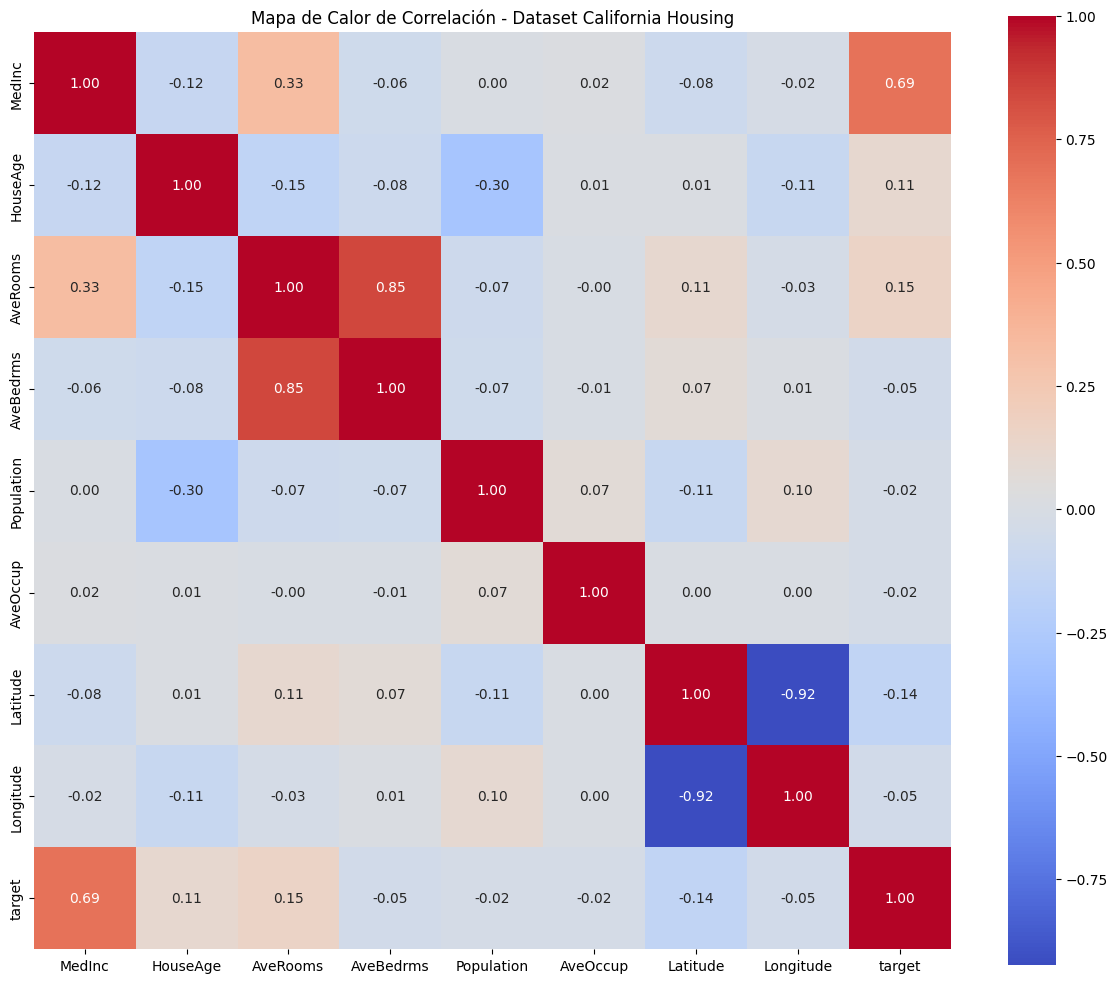


Estadísticas descriptivas DESPUÉS del escalado:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000,2.064000e+04,2.064000e+04
mean,5.508083e-17,4.406467e-17,7.711317e-17,-1.005225e-16,-1.101617e-17,0.000000,2.247298e-15,-8.603626e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-0.229000,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-0.061711,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-0.024316,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,0.020375,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,119.419103,2.958068e+00,2.625280e+00



✓ Todas las características ahora tienen una media cercana a 0 y una desviación estándar de 1.
✓ Esto facilita el entrenamiento de modelos de Machine Learning y mejora su rendimiento.


In [7]:
# 1. Cargar el conjunto de datos de California Housing
try:
    california_dataset = fetch_california_housing()
    df_california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
    df_california['target'] = california_dataset.target
    print("Dataset de California Housing cargado correctamente.")
    print(f"Dimensiones del dataset: {df_california.shape}")
    
    print("\nDescripción del dataset:")
    print("Este dataset contiene información sobre viviendas en California (1990).")
    print("La variable objetivo (target) representa el precio medio de las viviendas en cientos de miles de dólares.")

    # 2. Análisis Exploratorio de Datos (EDA)
    print("\nInformación del DataFrame:")
    df_california.info()

    print("\nRevisión de valores nulos:")
    print(df_california.isnull().sum())
    # Conclusión: No hay valores nulos que manejar.

    print("\nEstadísticas descriptivas:")
    display(df_california.describe())
    # Observación: Las características tienen escalas muy diferentes 
    # (e.g., AveRooms va de ~0.8 a ~141, mientras que Latitude va de ~32 a ~42).
    # Esto indica la necesidad de escalar los datos.

    # Visualización de la correlación entre características
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_california.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Mapa de Calor de Correlación - Dataset California Housing')
    plt.tight_layout()
    plt.show()
    # Observación: Hay correlación notable entre algunas variables.
    # Por ejemplo, el precio (target) tiene correlación negativa con Latitude.

    # 3. Aplicar técnicas de preparación
    # Separamos las características (X) y el objetivo (y)
    X = df_california.drop('target', axis=1)
    y = df_california['target']

    # Técnica 1: Escalado de Características (StandardScaler)
    # Estandariza las características eliminando la media y escalando a la varianza unitaria.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convertimos el resultado de vuelta a un DataFrame para una mejor visualización
    df_california_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print("\nEstadísticas descriptivas DESPUÉS del escalado:")
    display(df_california_scaled.describe())
    print("\n✓ Todas las características ahora tienen una media cercana a 0 y una desviación estándar de 1.")
    print("✓ Esto facilita el entrenamiento de modelos de Machine Learning y mejora su rendimiento.")
    
except Exception as e:
    print(f"Ocurrió un error: {e}")

### Ejercicio 3: Evaluación de Modelos de Regresión

**Objetivo:** Entrenar y evaluar modelos de regresión utilizando el dataset de California Housing.

**Proceso:**

1. Cargar y preparar el conjunto de datos.
2. Entrenar un modelo de regresión (usaremos Regresión Lineal y Random Forest).
3. Dividir datos en entrenamiento y prueba.
4. Realizar predicciones.
5. Calcular y mostrar las métricas de regresión: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE) y Coeficiente de Determinación (R²).
6. Visualizar los resultados.

Dataset cargado correctamente.
Características: 8, Muestras: 20640

Datos de entrenamiento: 16512 muestras
Datos de prueba: 4128 muestras

MODELO 1: REGRESIÓN LINEAL

Error Absoluto Medio (MAE): 0.5332
Error Cuadrático Medio (MSE): 0.5559
Raíz del Error Cuadrático Medio (RMSE): 0.7456
Coeficiente de Determinación (R²): 0.5758

MODELO 2: RANDOM FOREST REGRESSOR

Error Absoluto Medio (MAE): 0.3274
Error Cuadrático Medio (MSE): 0.2552
Raíz del Error Cuadrático Medio (RMSE): 0.5051
Coeficiente de Determinación (R²): 0.8053

Error Absoluto Medio (MAE): 0.3274
Error Cuadrático Medio (MSE): 0.2552
Raíz del Error Cuadrático Medio (RMSE): 0.5051
Coeficiente de Determinación (R²): 0.8053


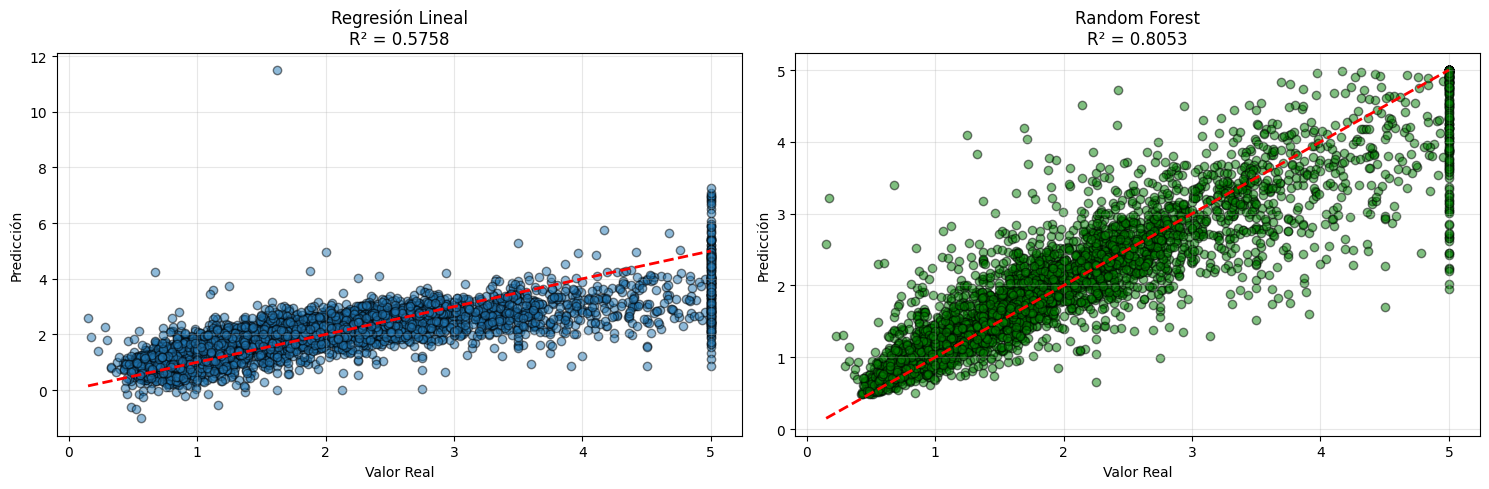


COMPARACIÓN DE MODELOS


,Modelo,MAE,MSE,RMSE,R²
0,Regresión Lineal,0.533200,0.555892,0.745581,0.575788
1,Random Forest,0.327425,0.255170,0.505143,0.805275


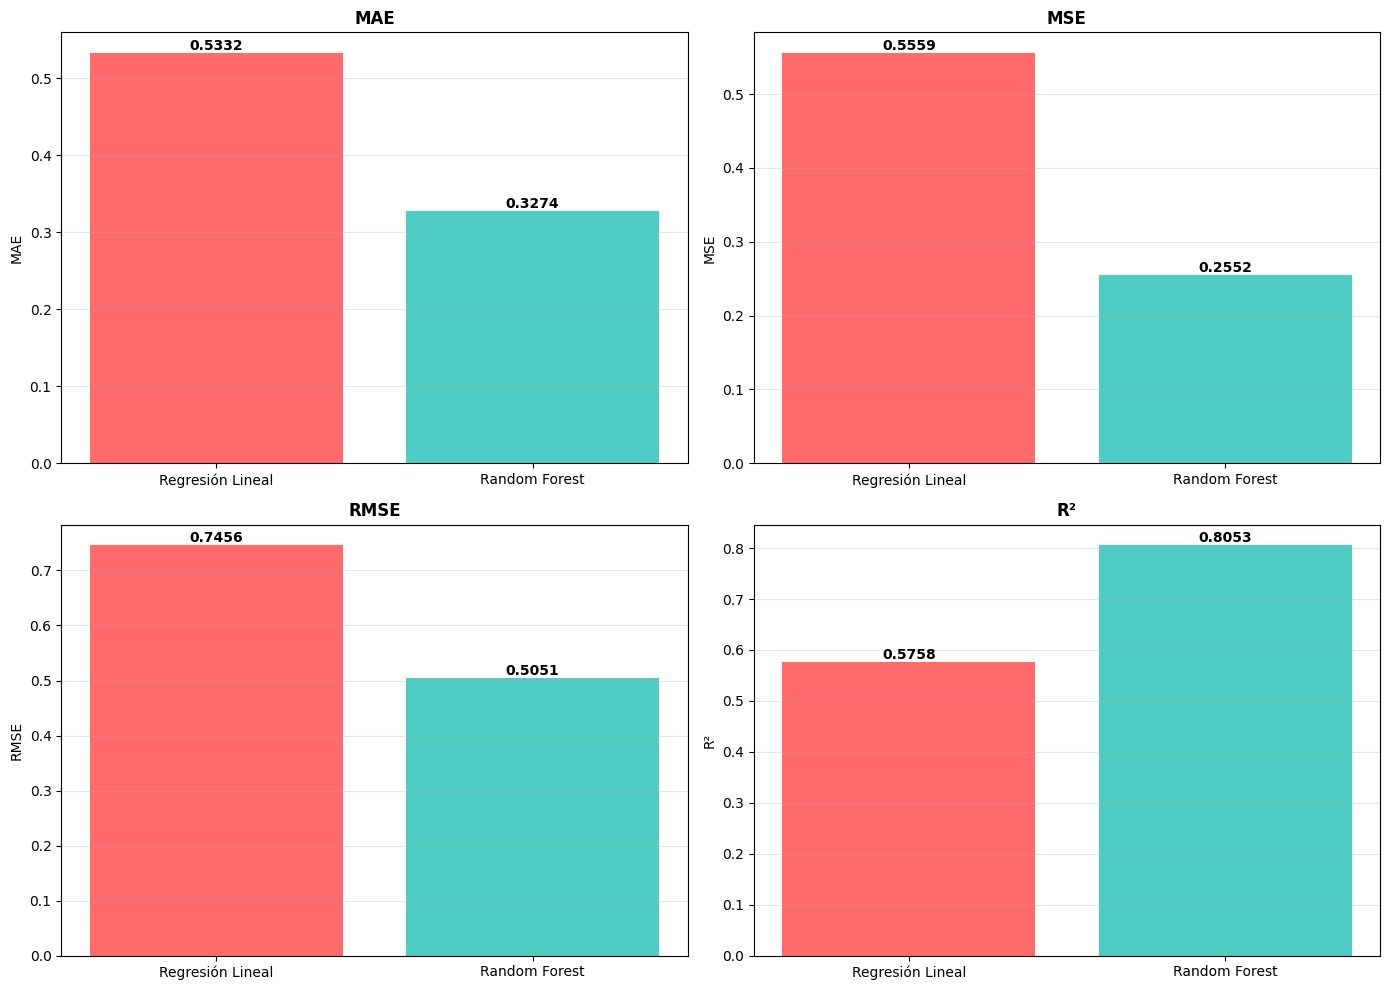


✓ Evaluación completada. Random Forest generalmente obtiene mejores resultados en este dataset.


In [8]:
# Ejercicio 3: Evaluación de Modelos de Regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Cargar el dataset de California Housing
california_data = fetch_california_housing()
X = pd.DataFrame(california_data.data, columns=california_data.feature_names)
y = california_data.target

print("Dataset cargado correctamente.")
print(f"Características: {X.shape[1]}, Muestras: {X.shape[0]}")

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nDatos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")

# 3. Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*60)
print("MODELO 1: REGRESIÓN LINEAL")
print("="*60)

# 4. Entrenar modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 5. Realizar predicciones
y_pred_lr = lr_model.predict(X_test_scaled)

# 6. Calcular métricas para Regresión Lineal
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nError Absoluto Medio (MAE): {mae_lr:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_lr:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_lr:.4f}")

print("\n" + "="*60)
print("MODELO 2: RANDOM FOREST REGRESSOR")
print("="*60)

# 7. Entrenar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# 8. Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# 9. Calcular métricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nError Absoluto Medio (MAE): {mae_rf:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.4f}")

# 10. Comparación visual
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico para Regresión Lineal
axes[0].scatter(y_test, y_pred_lr, alpha=0.5, edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Predicción')
axes[0].set_title(f'Regresión Lineal\nR² = {r2_lr:.4f}')
axes[0].grid(True, alpha=0.3)

# Gráfico para Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.5, edgecolors='k', color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Valor Real')
axes[1].set_ylabel('Predicción')
axes[1].set_title(f'Random Forest\nR² = {r2_rf:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 11. Comparación de métricas
metrics_comparison = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

print("\n" + "="*60)
print("COMPARACIÓN DE MODELOS")
print("="*60)
display(metrics_comparison)

# Gráfico de barras para comparar métricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['MAE', 'MSE', 'RMSE', 'R²']
colors = ['#FF6B6B', '#4ECDC4']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = metrics_comparison[metric].values
    ax.bar(['Regresión Lineal', 'Random Forest'], values, color=colors)
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Añadir valores sobre las barras
    for i, v in enumerate(values):
        ax.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Evaluación completada. Random Forest generalmente obtiene mejores resultados en este dataset.")

### Ejercicio 3b: Evaluación de Modelo de Regresión con Dataset Diabetes

**Objetivo:** Evaluar un modelo de regresión adicional usando el dataset de Diabetes de scikit-learn.

**Proceso:**
1. Cargar el dataset de Diabetes.
2. Entrenar un modelo de regresión.
3. Evaluar con las métricas estándar.
4. Visualizar resultados.

Dataset de Diabetes cargado correctamente.
Características: 10, Muestras: 442

Descripción: Este dataset contiene 10 variables base (edad, sexo, IMC, presión arterial
y seis mediciones de suero sanguíneo) para predecir la progresión de la diabetes.

RESULTADOS: RIDGE REGRESSION - Dataset Diabetes
Error Absoluto Medio (MAE): 42.81
Error Cuadrático Medio (MSE): 2892.01
Raíz del Error Cuadrático Medio (RMSE): 53.78
Coeficiente de Determinación (R²): 0.4541


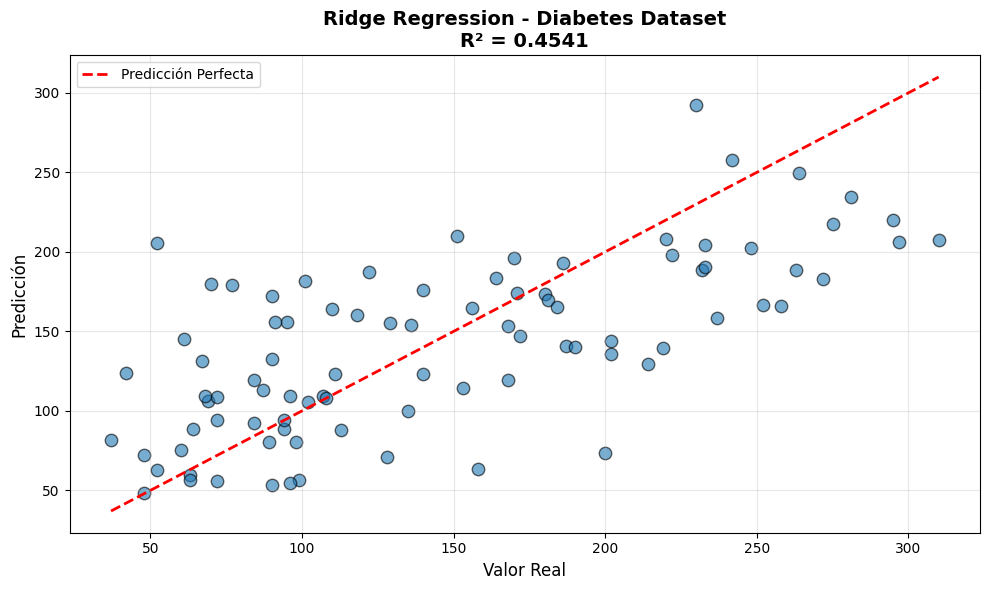

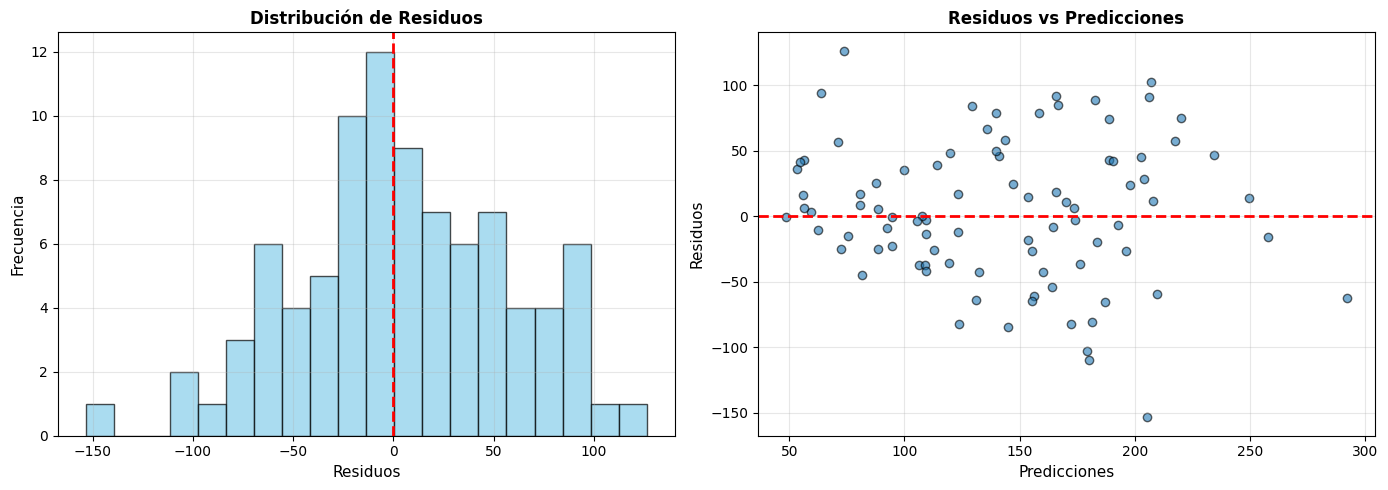


✓ Los residuos deben estar centrados en 0 y distribuidos aleatoriamente.


In [10]:
# Ejercicio 3b: Dataset de Diabetes
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# 1. Cargar el dataset
diabetes = load_diabetes()
X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_diabetes = diabetes.target

print("Dataset de Diabetes cargado correctamente.")
print(f"Características: {X_diabetes.shape[1]}, Muestras: {X_diabetes.shape[0]}")
print("\nDescripción: Este dataset contiene 10 variables base (edad, sexo, IMC, presión arterial")
print("y seis mediciones de suero sanguíneo) para predecir la progresión de la diabetes.")

# 2. Dividir datos
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# 3. Escalar características
scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

# 4. Entrenar modelo Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_d_scaled, y_train_d)

# 5. Predicciones
y_pred_ridge = ridge_model.predict(X_test_d_scaled)

# 6. Métricas
mae_ridge = mean_absolute_error(y_test_d, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_d, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_d, y_pred_ridge)

print("\n" + "="*60)
print("RESULTADOS: RIDGE REGRESSION - Dataset Diabetes")
print("="*60)
print(f"Error Absoluto Medio (MAE): {mae_ridge:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_ridge:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_ridge:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_ridge:.4f}")

# 7. Visualización
plt.figure(figsize=(10, 6))
plt.scatter(y_test_d, y_pred_ridge, alpha=0.6, edgecolors='k', s=80)
plt.plot([y_test_d.min(), y_test_d.max()], 
         [y_test_d.min(), y_test_d.max()], 
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Valor Real', fontsize=12)
plt.ylabel('Predicción', fontsize=12)
plt.title(f'Ridge Regression - Diabetes Dataset\nR² = {r2_ridge:.4f}', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Análisis de residuos
residuos = y_test_d - y_pred_ridge

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de residuos
axes[0].hist(residuos, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuos', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residuos vs Predicciones
axes[1].scatter(y_pred_ridge, residuos, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicciones', fontsize=11)
axes[1].set_ylabel('Residuos', fontsize=11)
axes[1].set_title('Residuos vs Predicciones', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Los residuos deben estar centrados en 0 y distribuidos aleatoriamente.")

### Ejercicio 4: Evaluación de Modelo de Clasificación

**Objetivo:** Entrenar y evaluar modelos de clasificación usando el dataset de Breast Cancer de scikit-learn, aplicando métricas numéricas y gráficas.

**Proceso:**

1. Cargar el conjunto de datos de Breast Cancer Wisconsin.
2. Preparar los datos (división entrenamiento/prueba).
3. Entrenar modelos de clasificación (Árbol de Decisión y SVM).
4. Realizar predicciones y obtener probabilidades.
5. Calcular métricas numéricas: Accuracy, Matriz de Confusión y Reporte de Clasificación.
6. Generar métricas gráficas: Curva ROC y comparación de modelos.

Dataset de Breast Cancer Wisconsin cargado correctamente.
Características: 30, Muestras: 569
Clases: ['malignant' 'benign']

Distribución de clases:
  - Maligno (0): 212 casos
  - Benigno (1): 357 casos

MODELO 1: ÁRBOL DE DECISIÓN

Accuracy Score: 0.9211

Reporte de Clasificación:
              precision    recall  f1-score   support

     Maligno       0.87      0.93      0.90        42
     Benigno       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



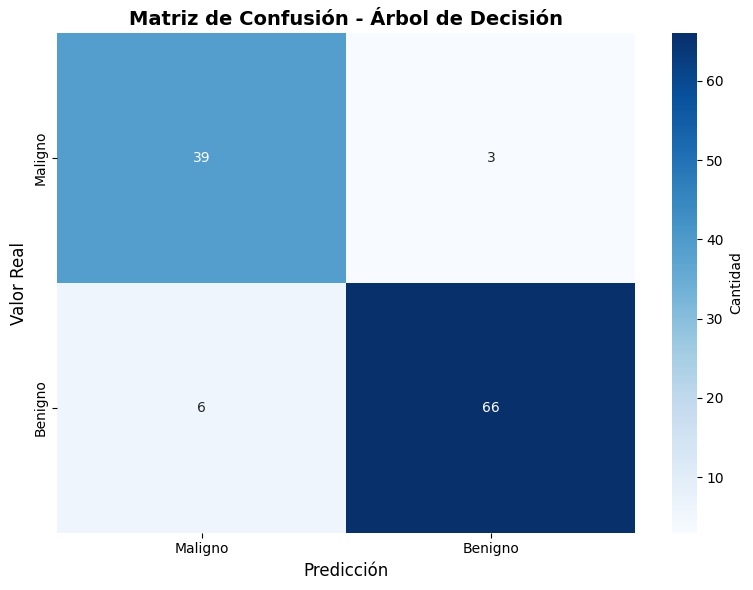


MODELO 2: SUPPORT VECTOR MACHINE (SVM)

Accuracy Score: 0.9825

Reporte de Clasificación:
              precision    recall  f1-score   support

     Maligno       0.98      0.98      0.98        42
     Benigno       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



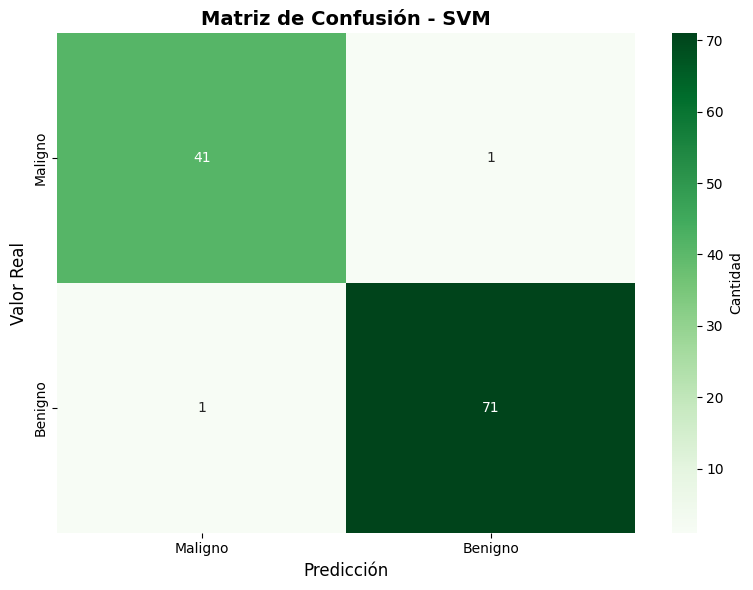

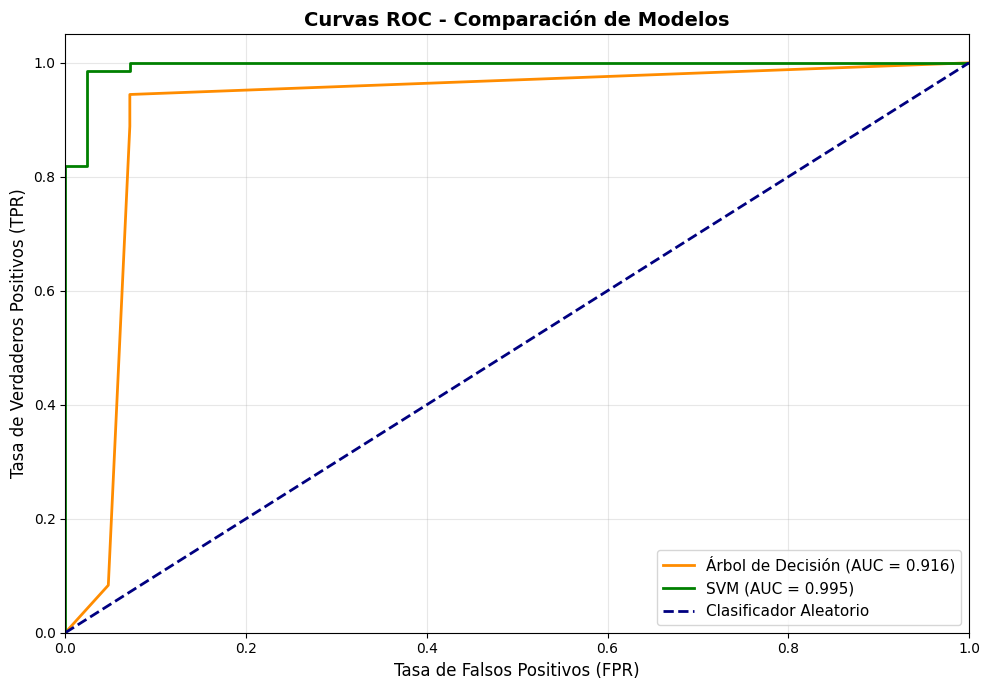


COMPARACIÓN FINAL DE MODELOS


,Modelo,Accuracy,AUC-ROC
0,Árbol de Decisión,0.921053,0.916336
1,SVM,0.982456,0.995040


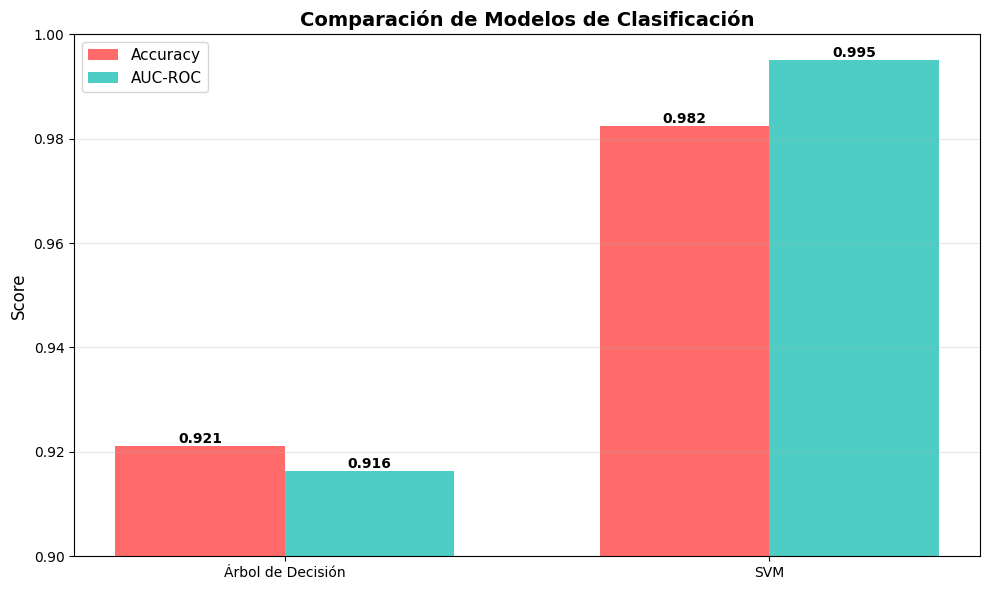


✓ Evaluación completada. Ambos modelos muestran excelente rendimiento.
✓ SVM generalmente obtiene resultados ligeramente mejores en este dataset.


In [11]:
# Ejercicio 4: Evaluación de Modelos de Clasificación
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. Cargar el dataset de Breast Cancer
cancer_data = load_breast_cancer()
X_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y_cancer = cancer_data.target

print("Dataset de Breast Cancer Wisconsin cargado correctamente.")
print(f"Características: {X_cancer.shape[1]}, Muestras: {X_cancer.shape[0]}")
print(f"Clases: {cancer_data.target_names}")
print(f"\nDistribución de clases:")
print(f"  - Maligno (0): {sum(y_cancer == 0)} casos")
print(f"  - Benigno (1): {sum(y_cancer == 1)} casos")

# 2. Dividir en entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# 3. Escalar características
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

print("\n" + "="*70)
print("MODELO 1: ÁRBOL DE DECISIÓN")
print("="*70)

# 4. Entrenar Árbol de Decisión
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_c_scaled, y_train_c)

# 5. Predicciones
y_pred_dt = dt_model.predict(X_test_c_scaled)
y_prob_dt = dt_model.predict_proba(X_test_c_scaled)[:, 1]

# 6. Métricas numéricas - Árbol de Decisión
acc_dt = accuracy_score(y_test_c, y_pred_dt)
print(f"\nAccuracy Score: {acc_dt:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test_c, y_pred_dt, target_names=['Maligno', 'Benigno']))

# Matriz de Confusión
cm_dt = confusion_matrix(y_test_c, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'],
            cbar_kws={'label': 'Cantidad'})
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión - Árbol de Decisión', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*70)

# 7. Entrenar SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_c_scaled, y_train_c)

# 8. Predicciones
y_pred_svm = svm_model.predict(X_test_c_scaled)
y_prob_svm = svm_model.predict_proba(X_test_c_scaled)[:, 1]

# 9. Métricas numéricas - SVM
acc_svm = accuracy_score(y_test_c, y_pred_svm)
print(f"\nAccuracy Score: {acc_svm:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test_c, y_pred_svm, target_names=['Maligno', 'Benigno']))

# Matriz de Confusión
cm_svm = confusion_matrix(y_test_c, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'],
            cbar_kws={'label': 'Cantidad'})
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión - SVM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 10. Curvas ROC comparativas
fpr_dt, tpr_dt, _ = roc_curve(y_test_c, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test_c, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, 
         label=f'Árbol de Decisión (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, 
         label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 11. Comparación final
comparison_df = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'SVM'],
    'Accuracy': [acc_dt, acc_svm],
    'AUC-ROC': [roc_auc_dt, roc_auc_svm]
})

print("\n" + "="*70)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*70)
display(comparison_df)

# Gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.35

ax.bar(x - width/2, comparison_df['Accuracy'], width, label='Accuracy', color='#FF6B6B')
ax.bar(x + width/2, comparison_df['AUC-ROC'], width, label='AUC-ROC', color='#4ECDC4')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Modelos de Clasificación', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Modelo'])
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.9, 1.0])

# Añadir valores sobre las barras
for i, (acc, auc_val) in enumerate(zip(comparison_df['Accuracy'], comparison_df['AUC-ROC'])):
    ax.text(i - width/2, acc, f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    ax.text(i + width/2, auc_val, f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Evaluación completada. Ambos modelos muestran excelente rendimiento.")
print("✓ SVM generalmente obtiene resultados ligeramente mejores en este dataset.")